In [1]:
import APEX as ap
import pyccl as ccl
import numpy as np

cosmo = ccl.Cosmology(
    Omega_c=0.261,
    Omega_b=0.049,
    h=0.677,
    n_s=0.9665,
    sigma8=0.8102,
    #transfer_function="bbks",
    #matter_power_spectrum="halofit")
)

In [2]:
gdwsp = ap.GalaxyDensityTracerWorkspace(
    sacc_file="/home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_x_cib(857).fits",
    tracer_name_root="hsc_zbin",
    max_index=3,
    cosmology=cosmo
)

cibwsp = ap.CIBIntensityTracerWorkspace(
    flux_fits_file="filtered_snu_planck.fits",
    cosmology=cosmo,
    tracer_name_root="CIBLenz__",
    single_index=2
)

tracer_combos = [('hsc_zbin0', 'hsc_zbin0'),
                 ('hsc_zbin1', 'hsc_zbin1'),
                 ('hsc_zbin2', 'hsc_zbin2'),
                 ('hsc_zbin3', 'hsc_zbin3'),
                 ('hsc_zbin0', 'CIBLenz__2'),
                 ('hsc_zbin1', 'CIBLenz__2'),
                 ('hsc_zbin2', 'CIBLenz__2'),
                 ('hsc_zbin3', 'CIBLenz__2'),
                ]

s = ap.SaccWorkspace('/home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_x_cib(857).fits', tracer_combinations=tracer_combos)

s.define_alias('cib_857GHz', 'CIBLenz__2')



{'CIBLenz__2': 'cib_857GHz'}


In [3]:
mmodel = ap.MaleubreModel(
    Tracer1Workspace=gdwsp,
    Tracer2Workspace=cibwsp,
    tracer_combos=tracer_combos,
    sacc_workspace=s,
    cosmology=cosmo,
    logged_N=True,
    k_max = 0.2
)

In [4]:
s.get_cut_beam_window(('hsc_zbin0', 'CIBLenz__2'), [200, 201.5, 207])

array([0.99145835, 0.99128827, 0.99085862], dtype='>f8')

In [5]:
# Test cut positions

tracer_combos = [('hsc_zbin0', 'hsc_zbin0')]

for i in range(len(tracer_combos)):
    print(mmodel.get_ell_max(tracer_combos[i]))

403


In [6]:
mcmc = ap.MCMCWorkspace(
    sacc_file='/home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_x_cib(857).fits',
    model=mmodel,
    likelihood_function='lightweight_log_likelihood_function',

)

params = ['b_g0', 'b_g1', 'b_g2', 'b_g3',
          'N_gg0', 'N_gg1', 'N_gg2', 'N_gg3',
          'A_gg0', 'A_gg1', 'A_gg2', 'A_gg3',
          'N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3',
          'A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3',
          'bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']
mcmc.set_param_priors(
    params=params,
    priors=[
        (0, 4), (0, 4), (0, 4), (0, 4),
        (-12, -4), (-12, -4), (-12, -4), (-12, -4),
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (-15, -8), (-15, -8), (-15, -8), (-15, -8),
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (0, 1), (0, 1), (0, 1), (0, 1),
    ]
)

mcmc.set_param_references(
    params=params,
    references=[
        0.8, 0.9, 1.2, 1.5,
        -8, -8, -8, -8,
        7, 7, 7, 7,
        -12, -12, -12, -12,
        7, 7, 7, 7,
        0.059, 0.11, 0.15, 0.18,
    ]
)

mcmc.set_param_proposals(
    params=params,
    proposals=[
        0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1,
        1, 1, 1, 1,
        0.1, 0.1, 0.1, 0.1,
        1, 1, 1, 1,
        0.003, 0.003, 0.003, 0.003,
    ]
)

mcmc.set_grouped_params({
    'b_gs': ['b_g0', 'b_g1', 'b_g2', 'b_g3'],
    'N_ggs': ['N_gg0', 'N_gg1', 'N_gg2', 'N_gg3'],
    'A_ggs': ['A_gg0', 'A_gg1', 'A_gg2', 'A_gg3'],
    'N_gnus': ['N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3'],
    'A_gnus': ['A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3'],    
    'bpsfrs': ['bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']
})

mcmc.MCMC_config(params, sampler_info={'minimize': {'seed':42}})

sampler = mcmc.minimize_run()


[<bound method maleubremodel.lightweight_log_likelihood_function of <apex.maleubremodel object at 0x7efe79efd010>>] Initialized external likelihood.
[minimize] *WARNING* This run has been SEEDED with seed 42
[minimize] Initializing
[minimize] Run 1/2 will start from random initial point:
[minimize] {'b_g0': np.float64(0.8), 'b_g1': np.float64(0.9), 'b_g2': np.float64(1.2), 'b_g3': np.float64(1.5), 'N_gg0': np.float64(-8.0), 'N_gg1': np.float64(-8.0), 'N_gg2': np.float64(-8.0), 'N_gg3': np.float64(-8.0), 'A_gg0': np.float64(7.0), 'A_gg1': np.float64(7.0), 'A_gg2': np.float64(7.0), 'A_gg3': np.float64(7.0), 'N_gnu0': np.float64(-12.0), 'N_gnu1': np.float64(-12.0), 'N_gnu2': np.float64(-12.0), 'N_gnu3': np.float64(-12.0), 'A_gnu0': np.float64(7.0), 'A_gnu1': np.float64(7.0), 'A_gnu2': np.float64(7.0), 'A_gnu3': np.float64(7.0), 'bpsfr0': np.float64(0.059), 'bpsfr1': np.float64(0.11), 'bpsfr2': np.float64(0.15), 'bpsfr3': np.float64(0.18)}
[minimize] Run 2/2 will start from random initial 

KeyboardInterrupt: 

In [ ]:
info_full = {
    'likelihood': {'logL': getattr(mmodel, 'log_likelihood_function')},
    'sampler': 'minimize',
    'params': {
        'bg0': {
            'prior': {
                'min': 0,
                'max': 4
            },
            'ref': 0.8,
            'proposal': 0.1 
        },
        'bg1': {
            'prior': {
                'min': 0,
                'max': 4
            },
            'ref': 0.9,
            'proposal': 0.1
        },
        'bg2': {
            'prior': {
                'min': 0,
                'max': 4
            },
            'ref': 1.2,
            'proposal': 0.1
        },
        'bg3': {
            'prior': {
                'min': 0,
                'max': 4
            },
            'ref': 1.5,
            'proposal': 0.1
        },
        'bpsfr0': {
            'prior': {
                'min': 0,
                'max': 1
            },
            'ref': 0.059,
            'proposal': 0.003
        },
        'bpsfr1': {
            'prior': {
                'min': 0,
                'max': 1
            },
            'ref': 0.11,
            'proposal': 0.003
        },
        'bpsfr2': {
            'prior': {
                'min': 0,
                'max': 1
            },
            'ref': 0.15,
            'proposal': 0.003
        },
        'bpsfr3': {
            'prior': {
                'min': 0,
                'max': 1
            },
            'ref': 0.18,
            'proposal': 0.003
        },
        'Ngg0': {
            'prior': {
                'min': -12,
                'max': -4
            },
            'ref': -8,
            'proposal': 0.1
        },
        'Ngg1': {
            'prior': {
                'min': -12,
                'max': -4
            },
            'ref': -8,
            'proposal': 0.1
        },
        'Ngg2': {
            'prior': {
                'min': -12,
                'max': -4
            },
            'ref': -8,
            'proposal': 0.1
        },
        'Ngg3': {
            'prior': {
                'min': -12,
                'max': -4
            },
            'ref': -8,
            'proposal': 0.1
        },
        'Ngnu0': {
            'prior': {
                'min': -15,
                'max': -8
            },
            'ref': -12,
            'proposal': 0.1
        },
        'Ngnu1': {
            'prior': {
                'min': -15,
                'max': -8
            },
            'ref': -12,
            'proposal': 0.1
        },
        'Ngnu2': {
            'prior': {
                'min': -15,
                'max': -8
            },
            'ref': -12,
            'proposal': 0.1
        },
        'Ngnu3': {
            'prior': {
                'min': -15,
                'max': -8
            },
            'ref': -12,
            'proposal': 0.1
        },
        'Agg0': {
            'prior': {
                'min': -100,
                'max': 100
            },
            'ref': 7,
            'proposal': 1
        },
        'Agg1': {
            'prior': {
                'min': -100,
                'max': 100
            },
            'ref': 7,
            'proposal': 1
        },
        'Agg2': {
            'prior': {
                'min': -100,
                'max': 100
            },
            'ref': 7,
            'proposal': 1
        },
        'Agg3': {
            'prior': {
                'min': -100,
                'max': 100
            },
            'ref': 7,
            'proposal': 1
        },
        'Agnu0': {
            'prior': {
                'min': -100,
                'max': 100
            },
            'ref': 7,
            'proposal': 1
        },
        'Agnu1': {
            'prior': {
                'min': -100,
                'max': 100
            },
            'ref': 7,
            'proposal': 1
        },
        'Agnu2': {
            'prior': {
                'min': -100,
                'max': 100
            },
            'ref': 7,
            'proposal': 1
        },
        'Agnu3': {
            'prior': {
                'min': -100,
                'max': 100
            },
            'ref': 7,
            'proposal': 1
        },

        
    }
}

mcmc = ap.MCMCWorkspace(
    sacc_file='/home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_x_cib(857).fits',
    model=mmodel,
    likelihood_function='log_likelihood_function',
    full_info=info_full

)

sampler = mcmc.minimize_run()

[logl] Initialized external likelihood.
[model] *ERROR* Requirement A_ggs of logL is not provided by any component, nor sampled directly


LoggedError: Requirement A_ggs of logL is not provided by any component, nor sampled directly

In [ ]:
0.469718 /  1.633484

0.2875559234127791

In [ ]:
modelled = mmodel.get_modelled_data(
    b_gs=np.array([0.962442, 1.128193, 1.306405, 1.655859]),
    N_ggs=np.array([-7.11044, -9.346793, -9.893426, -8.653993]),
    A_ggs=np.array([4.841672, 8.002266, 11.706755, 27.02337]),
    N_gnus=np.array([-12.057331, -12.250513, -12.754224, -11.944748]),
    A_gnus=np.array([0.543653, 0.905731, 1.101477, 0.665272]),
    bpsfrs=np.array([0.018771, 0.051464, 0.089074, 0.135279]),
    full_ells=True
)

In [ ]:
# blue HSC map

modelled = mmodel.get_modelled_data(
    b_gs=np.array([1.026474, 1.104951, 1.29494, 1.661452]),
    N_ggs=np.array([-6.84985, -3.740814, -10.887948, -10.108594]),
    A_ggs=np.array([6.667355, 10.031404, 13.381839, 28.142617]),
    N_gnus=np.array([-2.612602, -9.204992, -9.261518, -15.0]),
    A_gnus=np.array([0.054902, 0.66334, 2.125307, 3.001524]),
    bpsfrs=np.array([0.023057, 0.061194, 0.139908, 0.269063]),
    full_ells=True
)

{'hsc_zbin0': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0   0xec2671b16297bc   0x9bcf4d5d4c90a5c7    0       0    , 'hsc_zbin1': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x9eea5d591981bb9e  0x9bcf4d5d4c90a5c7    0       0    , 'hsc_zbin2': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x599010496e989078  0x9bcf4d5d4c90a5c7    0       0    , 'CIBLenz__3': <pyccl.tracers.Tracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x57d86194758c6bfb         None           0       0    }
BOO Getting C_ell for tracer hsc_zbin0 and hsc_zbin0
Using full ells for tracer combination hsc_zbin0 and hsc_zbin0
BOO Getting C_ell for tracer hsc_zbin1 and hsc_zbin1
Using full ells for tracer combination hsc_zbin1 and hsc_zbin1
BOO Getting C_ell for tracer hsc_zbin2 and hsc_zbin2
Using full ells for tracer combination hsc_zbin2 and hsc_zbin2
BOO Gett

In [ ]:

measured_data = s.get_c_ells(tracer_combos)

errors = s.get_errors(tracer_combos)

print(measured_data[0][0])


[  21.5   61.5  101.5  141.5  181.5  221.5  261.5  301.5  341.5  381.5
  421.5  461.5  501.5  541.5  581.5  621.5  661.5  701.5  741.5  781.5
  821.5  861.5  901.5  941.5  981.5 1021.5 1061.5 1101.5 1141.5 1181.5
 1221.5 1261.5 1301.5 1341.5 1381.5 1421.5 1461.5 1501.5 1541.5 1581.5
 1621.5 1661.5 1701.5 1741.5 1781.5 1821.5 1861.5 1901.5 1941.5 1981.5
 2021.5 2061.5 2101.5 2141.5 2181.5 2221.5 2261.5 2301.5 2341.5 2381.5
 2421.5 2461.5 2501.5 2541.5 2581.5 2621.5 2661.5 2701.5 2741.5 2781.5
 2821.5 2861.5 2901.5 2941.5 2981.5 3021.5]


3021.5 461.5
3021.5 581.5
3021.5 781.5
3021.5 901.5
3
3021.5 461.5
[3.66059371e-06 1.12339025e-06 4.74717739e-08]
3021.5 581.5
[1.46832934e-07]
3021.5 781.5
[5.34955260e-07 9.05023321e-08]
3021.5 901.5
[3.51126525e-06 6.72434399e-08]
3


/home/nathand/Documents/AstroCode/APEX/Examples/Plots.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(measured_data[0][i][~masks[i]], modelled_data[1][i][~masks[i]], 'k.', zorder=0, markersize=2,  color='C1')


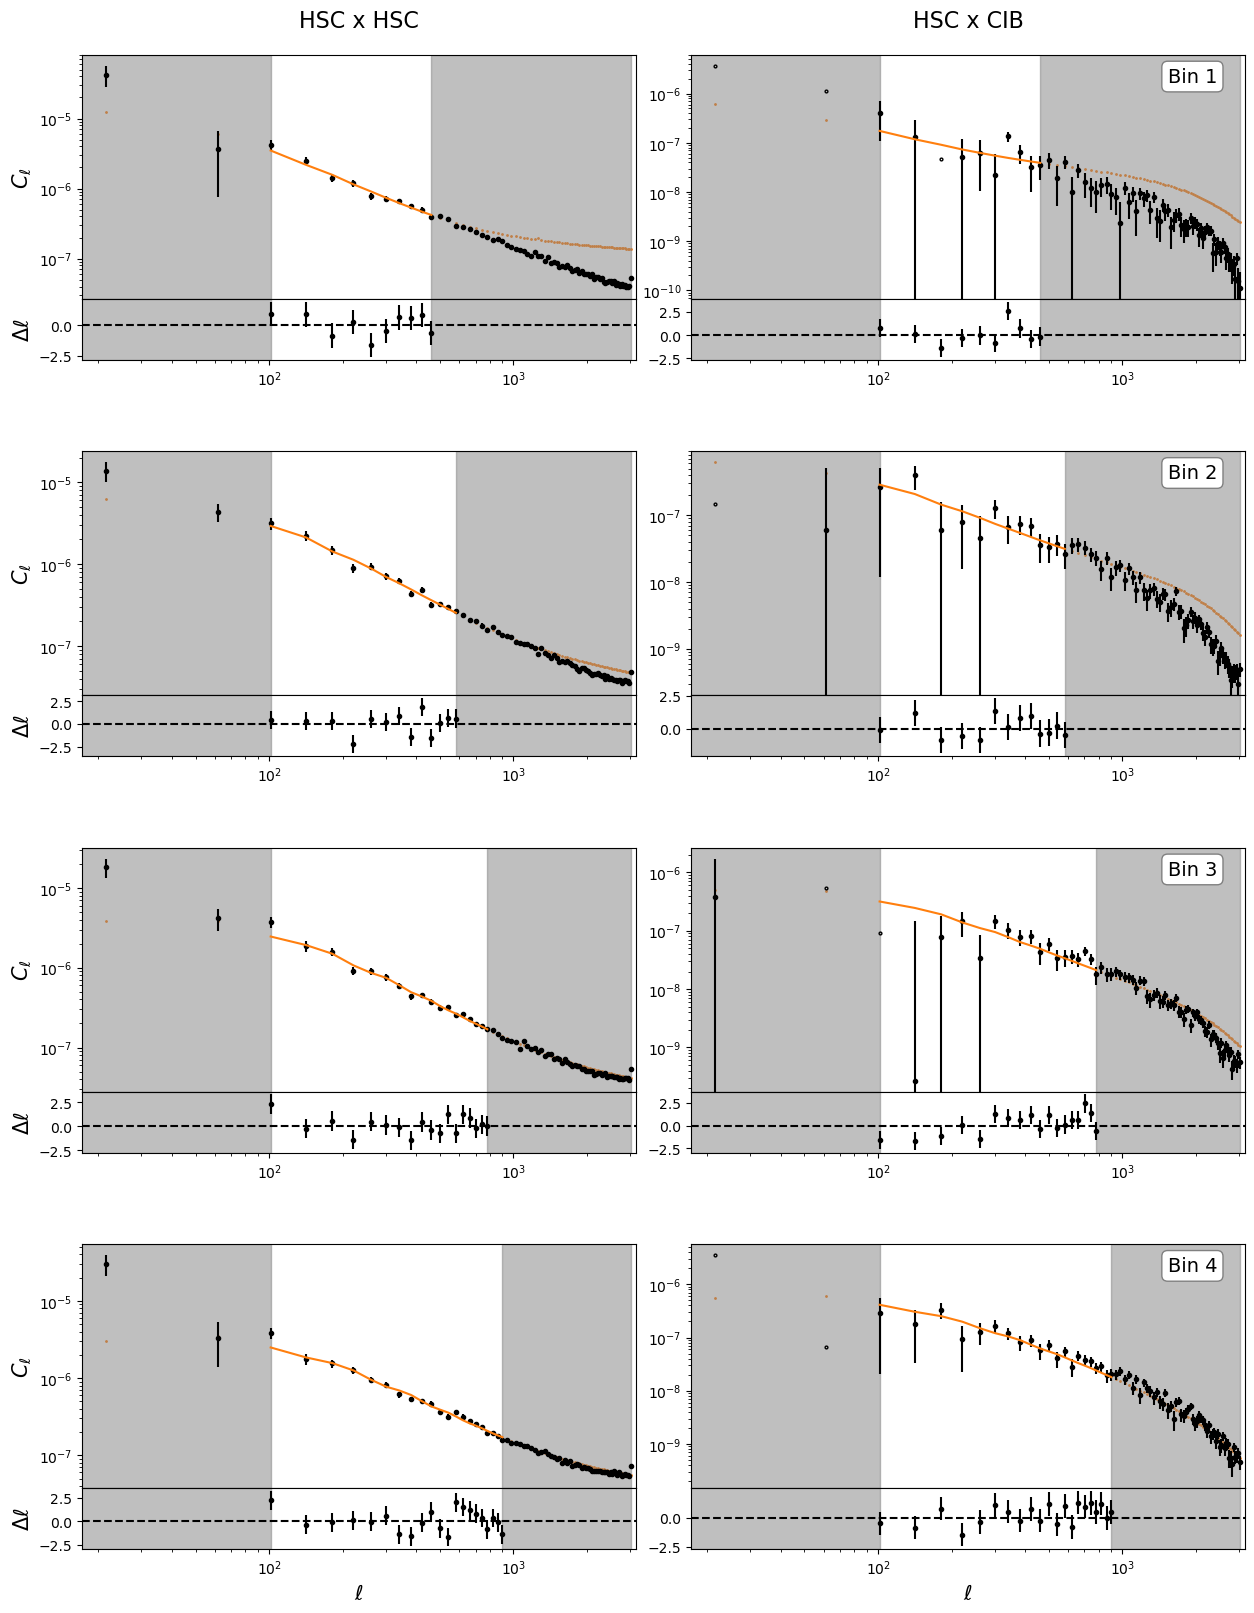

In [ ]:
plotter = ap.Plots(s)

plotter.create_grid_plot(
    subplot_titles=['HSC x HSC', 'HSC x CIB'],
    subplot_tracer_combos=tracer_combos,
    measured_data=measured_data,
    measured_data_err=errors,
    modelled_data=modelled,
    cut_positions=[None, None],
    residuals=True,
    full_ells=True,
    variable_cuts=True
)